In [19]:
import numpy as np
import pandas as pd

data = pd.read_csv('MOMENT.csv',header=None)
print(data.shape)


(70927, 43)


In [20]:
shape=data.shape
N=shape[0]

X = np.zeros((N,13,1))
Ls = np.zeros((N,3,1))


Y = np.zeros((N,13))
LPF = np.zeros((N,1))

for ii in range(0,N-1):
    q1 = int(data.iloc[ii,0])
    q2 = int(data.iloc[ii,1])
    q3 = int(data.iloc[ii,2])
    
    l1 = data.iloc[ii,3]
    l2 = data.iloc[ii,4]
    l3 = data.iloc[ii,5]

    
    
    
    X[ii,q1,0] = 1
    X[ii,q2,0] = 1
    X[ii,q3,0] = 1
    
    Ls[ii,0,0]=l1
    Ls[ii,1,0]=l2
    Ls[ii,2,0]=l3
    
    Y[ii,:] = data.iloc[ii][[8,10,13,16,19,22,25,28,31,34,37,40,43]]
    LPF[ii,0]= data.iloc[ii][6]

    
xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12]




    

c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [21]:
print(X[26580])
print(Ls[26580])
print(Y[0])
print(data.iloc[70926])

[[0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]]
[[30.]
 [60.]
 [60.]]
[ -394.213   -788.425  -1576.85   -2365.28   -1671.91     503.254
  2678.42    -237.643   -190.114   -142.586    -95.0571   -47.5285
        nan]
0      0.0
1      0.5
2      1.0
3      1.0
4      1.5
5      2.0
6      2.0
7      3.0
8      3.0
9      3.5
10     4.0
11     4.0
12     4.5
13     5.0
14     5.0
15     5.5
16     6.0
17     6.0
18     6.5
19     7.0
20     7.0
21     7.5
22     8.0
23     8.0
24     8.5
25     9.0
26     9.0
27     9.5
28    10.0
29    10.0
30    10.5
31    11.0
32    11.0
33    11.5
34    12.0
35     NaN
36     NaN
37     NaN
38     NaN
39     NaN
40     NaN
41     NaN
42     NaN
Name: 70926, dtype: float64


In [ ]:
import keras as krs
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from keras.utils import plot_model

# define two sets of inputs
inputA = krs.Input(shape=(13,1))
inputB = krs.Input(shape=(3,))

# the first branch operates on the first input
x = Conv1D(128, kernel_size=1, activation="relu")(inputA)
x = Conv1D(64, kernel_size=1, activation="relu")(x)
x = Conv1D(32, kernel_size=1, activation="relu")(x)
x = Conv1D(24, kernel_size=1, activation="relu")(x)
x = Conv1D(13, kernel_size=1, activation="relu")(x)
x = Flatten()(x)
x = Dense(13, activation="relu")(x)
x = krs.Model(inputs=inputA, outputs=x)

print(x.output)

# the second branch opreates on the second input
y = Dense(3, activation="linear")(inputB)
y = krs.Model(inputs=inputB, outputs=y)

print(y.output)

# combine the output of the two branches
combined = krs.layers.concatenate([x.output, y.output])

# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(64, activation="relu")(combined)
z = Dense(32, activation="relu")(z)
z = Dense(24, activation="relu")(z)
z = Dense(13, activation="linear")(z)

# our model will accept the inputs of the two branches and
# then output a single value
model = krs.Model(inputs=[x.input, y.input], outputs=z)


model.compile(loss='mean_squared_error', optimizer=krs.optimizers.adam(clipnorm=1))
history1 = model.fit( [X,Ls[:,:,0]], Y, validation_data=([X,Ls[:,:,0]], Y), epochs=30, batch_size=32, verbose=1)  

 
    
    
plt.figure()
# Plot training & validation loss values
plt.plot(history1.history['loss'],label = 'mlp')
  
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

Tensor("dense_31/Relu:0", shape=(?, 13), dtype=float32)
Tensor("dense_32/BiasAdd:0", shape=(?, 3), dtype=float32)
Train on 70927 samples, validate on 70927 samples
Epoch 1/30
70927/70927 [==============================] - 12s 168us/step - loss: nan - val_loss: nan
Epoch 2/30
70927/70927 [==============================] - 11s 155us/step - loss: nan - val_loss: nan
Epoch 3/30
70927/70927 [==============================] - 11s 156us/step - loss: nan - val_loss: nan
Epoch 4/30
70927/70927 [==============================] - 11s 156us/step - loss: nan - val_loss: nan
Epoch 5/30
70927/70927 [==============================] - 11s 149us/step - loss: nan - val_loss: nan
Epoch 6/30
70927/70927 [==============================] - 11s 152us/step - loss: nan - val_loss: nan
Epoch 7/30
70927/70927 [==============================] - 11s 150us/step - loss: nan - val_loss: nan
Epoch 8/30
70927/70927 [==============================] - 11s 151us/step - loss: nan - val_loss: nan
Epoch 9/30
70927/70927 [====

[0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.] [238. 238. 476.]


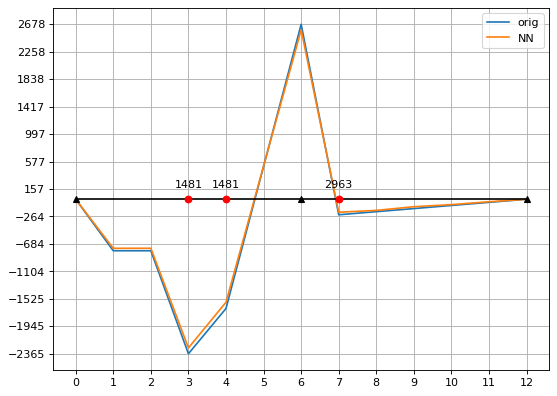

[0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.] [228. 228. 114.]


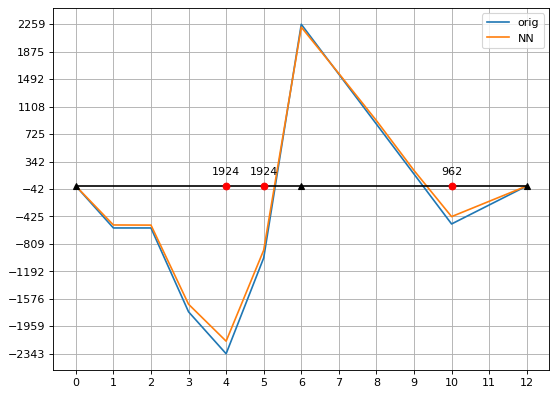

[0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.] [255.  510.  127.5]


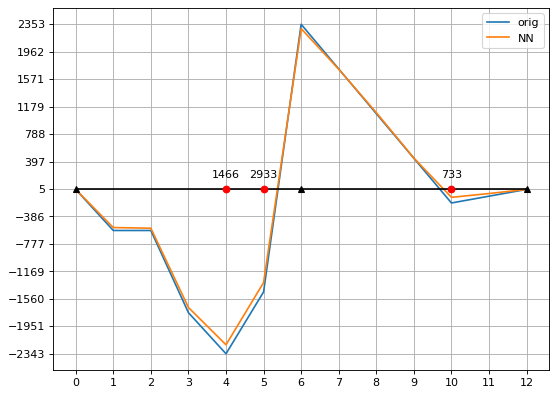

[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [141.   70.5 141. ]


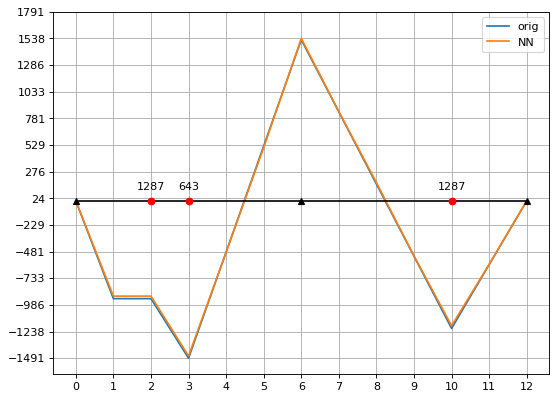

[0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.] [338. 338. 676.]


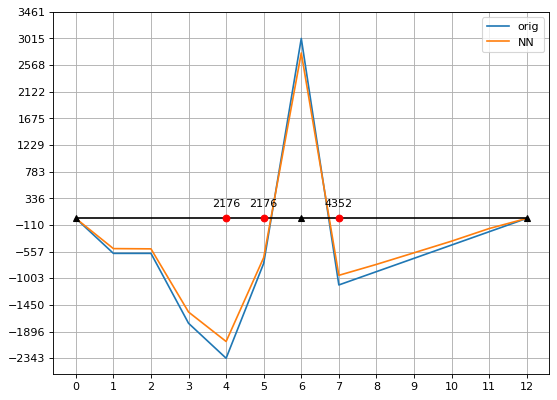

[0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [357. 714. 357.]


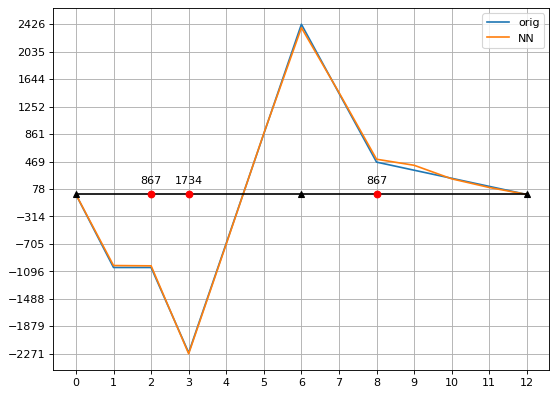

[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [118. 236. 236.]


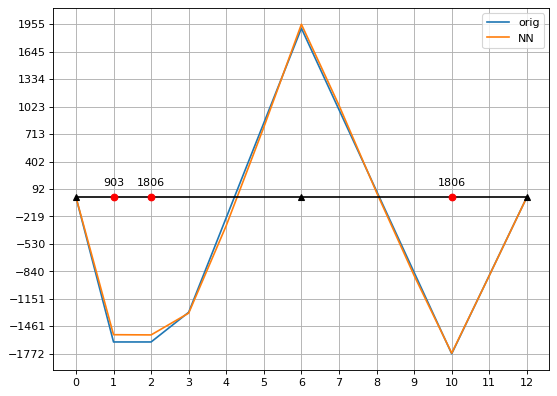

[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [38. 19. 38.]


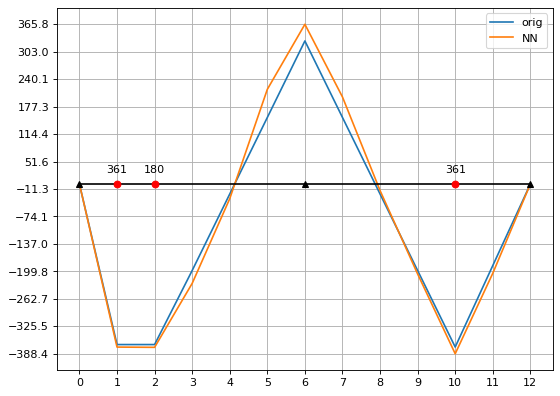

[0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.] [301.  301.  150.5]


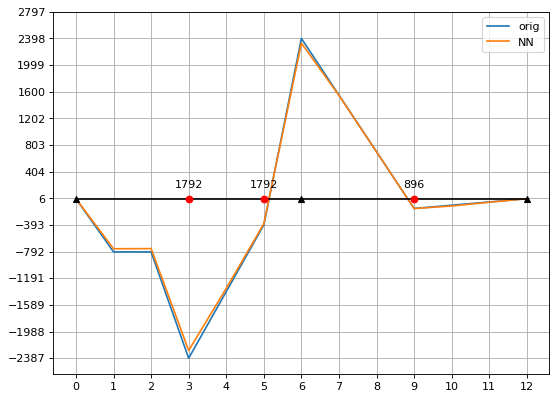

[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.] [256. 256. 256.]


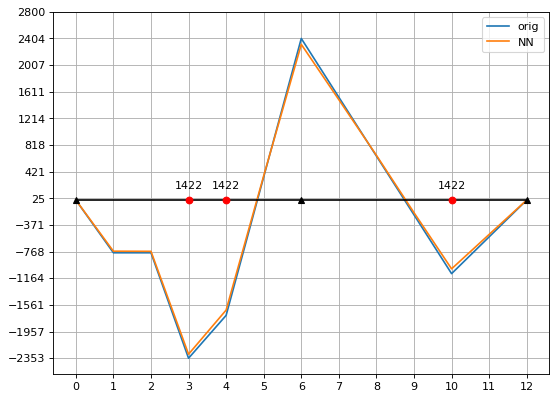

[0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.] [377.  377.  188.5]


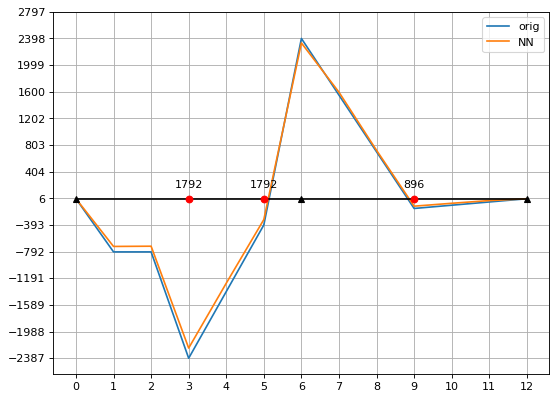

[0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.] [325.  162.5 325. ]


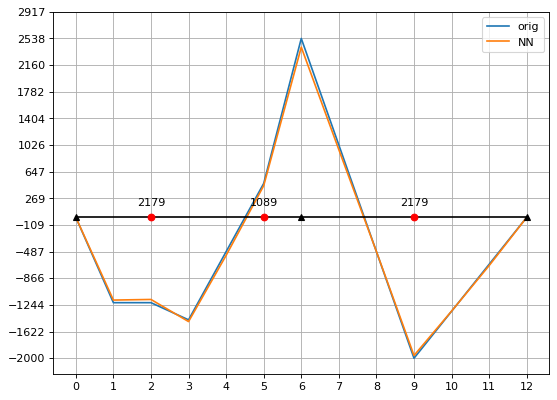

[0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.] [331.  165.5 662. ]


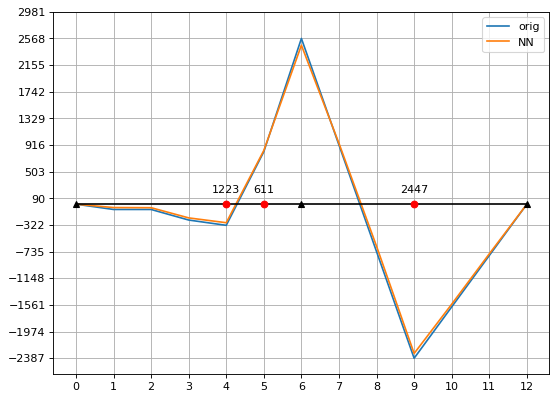

[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.] [174.  87. 348.]


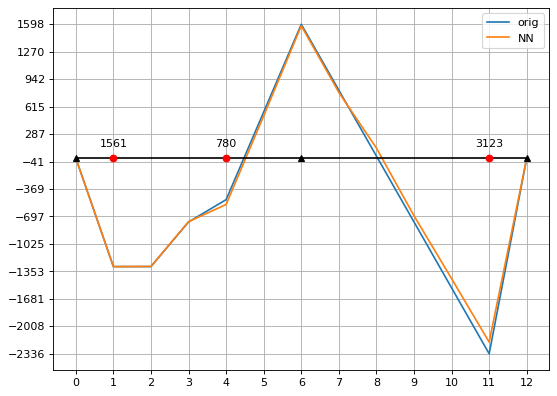

[0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.] [111.  222.   55.5]


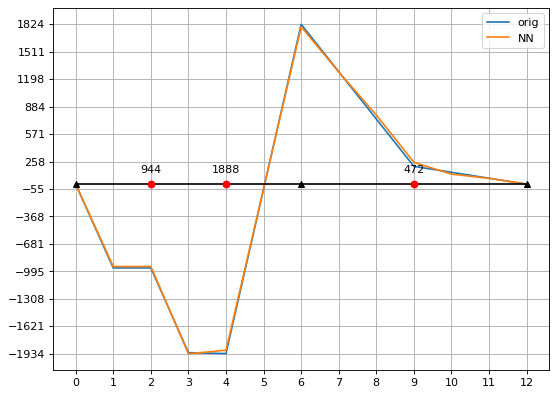

[0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.] [82. 82. 41.]


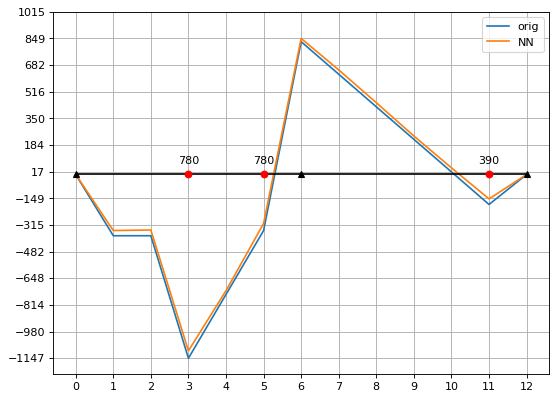

[0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.] [341.  170.5 341. ]


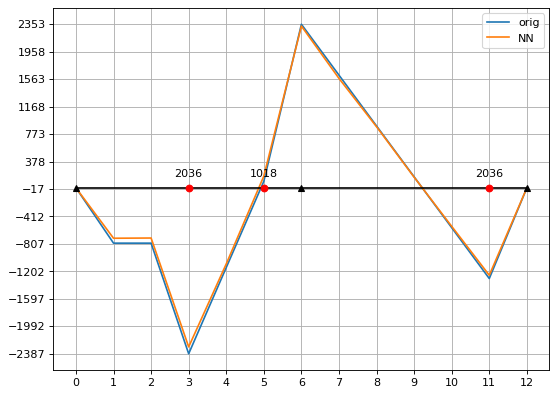

[0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.] [248. 124. 248.]


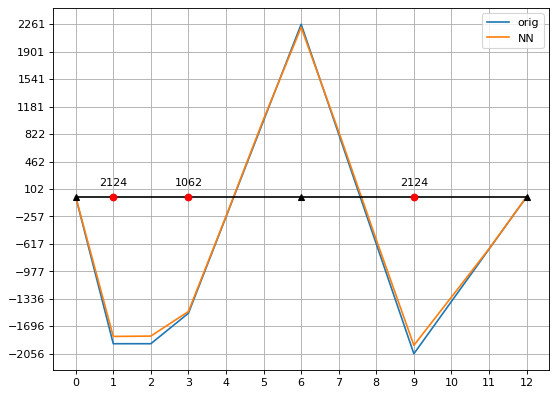

[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.] [ 91.  182.   45.5]


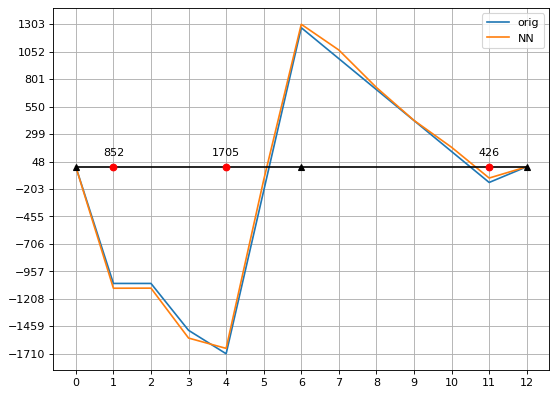

[0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.] [ 94. 188.  94.]


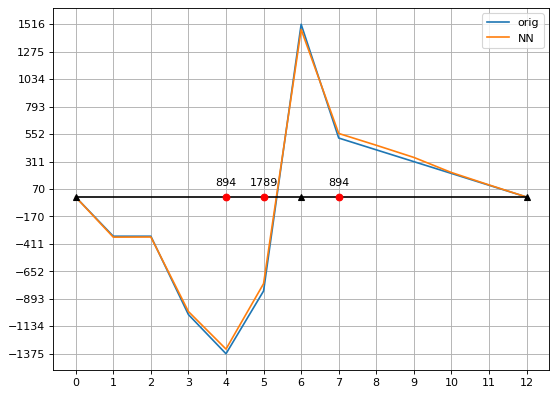

In [13]:
y_pred1 = model.predict([X,Ls[:,:,0]])
import time
from matplotlib.pyplot import figure


for ii in range(20):
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    print(X[ii,:,0],Ls[ii,:,0])
    
    maximo = max([max(y_pred1[ii,:]),max(Y[ii,:])])
    minimo = min([min(y_pred1[ii,:]),min(Y[ii,:])])
        
    plt.plot(Y[ii,:],label='orig')
    plt.plot(y_pred1[ii,:],label='NN')
    #plt.plot(Y[ii,:]-y_pred1[ii,:],label='error')
    
    plt.plot([0,0,0,0,0,0,0,0,0,0,0,0,0],'k-')
    plt.plot([0,6,12],[0,0,0],'^k')
    loads=np.where(X[ii,:,0]==1)[0]
    plt.plot(loads,[0,0,0],'ro')
    
    for i in range(0,3):
        plt.annotate(int(Ls[ii,i,0]*LPF[ii,0]), # this is the text
        (loads[i],0), # this is the point to label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        ha='center') # horizontal alignment can be left, right or center

        
    stepd=(maximo-minimo)/12.0
    plt.yticks(np.arange(minimo, maximo +stepd ,step=stepd))
    plt.xticks(xticks)
    plt.legend()
    plt.grid()
    plt.show()
    time.sleep(2) 
    plt.close()

In [14]:

np.set_printoptions(precision=3)



err = np.sum(np.abs(y_pred1-Y)/N,axis=0)
print("errors1\n ", err)





errors1
  [3.517e-02 5.102e+01 5.212e+01 7.671e+01 7.948e+01 6.745e+01 7.658e+01
 5.132e+01 6.087e+01 6.754e+01 7.172e+01 4.606e+01 1.507e-02]


In [15]:
Pos = np.zeros((13,13,1))
Pesos_05 = np.zeros((13,3,1))
Pesos_1 = np.zeros((13,3,1))
Pesos_2 = np.zeros((13,3,1))

for i in range(13):
    Pos[i,2,0] = 1
    Pos[i,4,0] = 1
    Pos[i,9,0] = 1
    Pesos_05[i,0,0] = 30*(i+1)
    Pesos_05[i,1,0] = 30*(i+1)/2
    Pesos_05[i,2,0] = 30*(i+1)/2
    Pesos_1[i,0,0] = 30*(i+1)
    Pesos_1[i,1,0] = 30*(i+1)
    Pesos_1[i,2,0] = 30*(i+1)
    Pesos_2[i,0,0] = 30*(i+1)
    Pesos_2[i,1,0] = 30*(i+1)*2
    Pesos_2[i,2,0] = 30*(i+1)*2
    
    
Inc_MOMENT_05 = model.predict([Pos,Pesos_05[:,:,0]])
Inc_MOMENT_1 = model.predict([Pos,Pesos_1[:,:,0]])
Inc_MOMENT_2 = model.predict([Pos,Pesos_2[:,:,0]])
print(Pesos_05)
print(Pesos_1)
print(Pesos_2)

[[[ 30.]
  [ 15.]
  [ 15.]]

 [[ 60.]
  [ 30.]
  [ 30.]]

 [[ 90.]
  [ 45.]
  [ 45.]]

 [[120.]
  [ 60.]
  [ 60.]]

 [[150.]
  [ 75.]
  [ 75.]]

 [[180.]
  [ 90.]
  [ 90.]]

 [[210.]
  [105.]
  [105.]]

 [[240.]
  [120.]
  [120.]]

 [[270.]
  [135.]
  [135.]]

 [[300.]
  [150.]
  [150.]]

 [[330.]
  [165.]
  [165.]]

 [[360.]
  [180.]
  [180.]]

 [[390.]
  [195.]
  [195.]]]
[[[ 30.]
  [ 30.]
  [ 30.]]

 [[ 60.]
  [ 60.]
  [ 60.]]

 [[ 90.]
  [ 90.]
  [ 90.]]

 [[120.]
  [120.]
  [120.]]

 [[150.]
  [150.]
  [150.]]

 [[180.]
  [180.]
  [180.]]

 [[210.]
  [210.]
  [210.]]

 [[240.]
  [240.]
  [240.]]

 [[270.]
  [270.]
  [270.]]

 [[300.]
  [300.]
  [300.]]

 [[330.]
  [330.]
  [330.]]

 [[360.]
  [360.]
  [360.]]

 [[390.]
  [390.]
  [390.]]]
[[[ 30.]
  [ 60.]
  [ 60.]]

 [[ 60.]
  [120.]
  [120.]]

 [[ 90.]
  [180.]
  [180.]]

 [[120.]
  [240.]
  [240.]]

 [[150.]
  [300.]
  [300.]]

 [[180.]
  [360.]
  [360.]]

 [[210.]
  [420.]
  [420.]]

 [[240.]
  [480.]
  [480.]]

 [[270.]
  [54

In [16]:
MOMENT05 =  pd.read_csv('moment_alpha05_beta05.csv', header=None)
MOMENT1 =  pd.read_csv('moment_alpha1_beta1.csv', header=None)
MOMENT2 =  pd.read_csv('moment_alpha2_beta2.csv', header=None)


def make_graph(_xx,_var,MOMENT):
    moment=[]
    load=[]
    for i in range(0,13):
        load.append(int(MOMENT.iloc[i][3]*MOMENT.iloc[i][6]))
        moment.append(MOMENT.iloc[i][[8,10,13,16,19,22,25,28,31,34,37,40,43]])
    



    figure(num=None, figsize=(20, 12), dpi=80, facecolor='w', edgecolor='k')
    maxes=[]
    mins=[]
    
    for i in range(0,3):
        maxes.append(max(max(_var[i]),max(moment[i])))
        mins.append(min(min(_var[i]),min(moment[i])))
        plt.plot(_xx,_var[i],'r',label=str(load[i])+'N-Rede') 
        plt.plot(_xx,moment[i],'b',label=str(load[i])+'N-Original')
        
    stepd=(max(maxes)-min(mins))/20.0
    plt.yticks(np.arange(min(mins), max(maxes)+stepd ,step=stepd))
    plt.xticks(xticks)
    plt.grid(True)

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()
    
    
    
    np.set_printoptions(precision=3)



    err = np.sum(np.abs((_var-moment)/moment*100)/12,axis=0)
    print("errors1\n ", err)

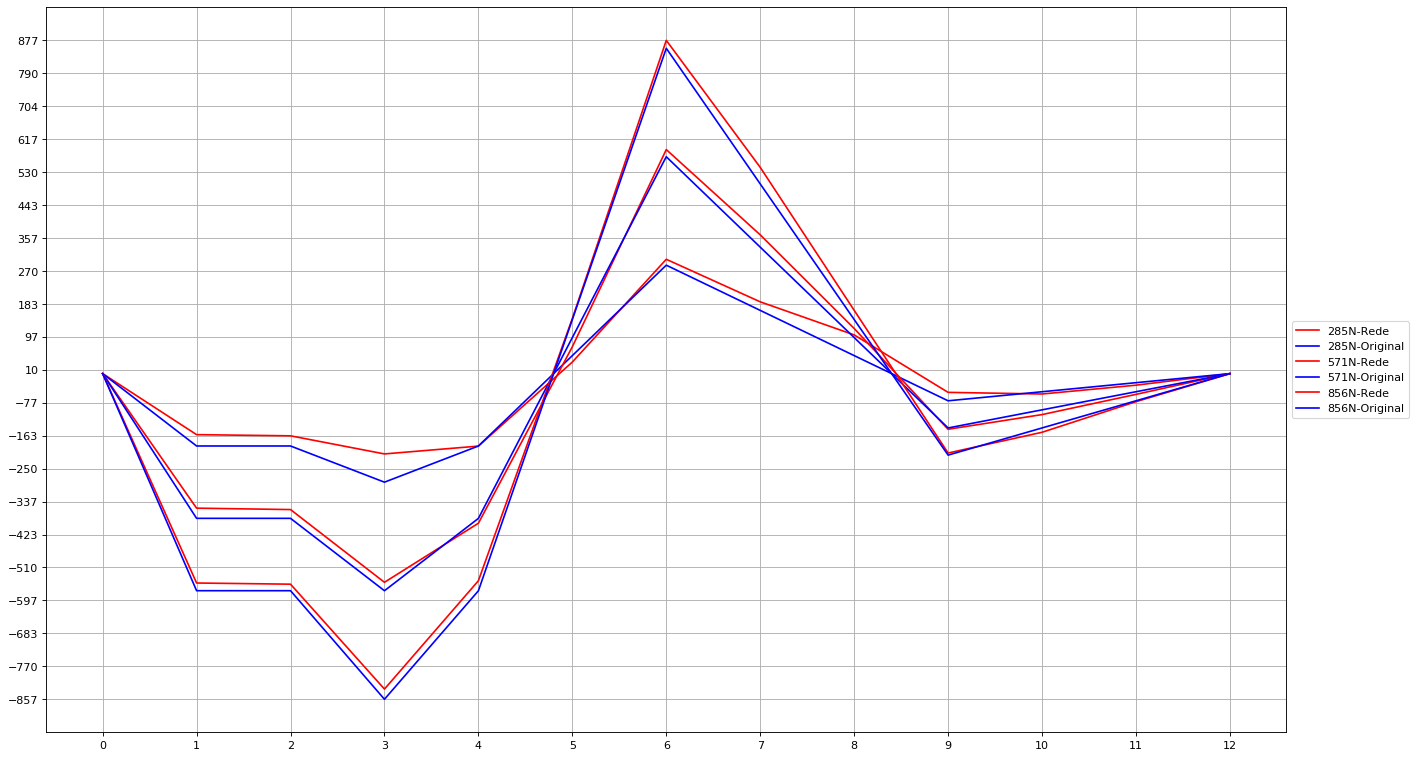

errors1
  [inf 5.9839873499727485 6.173197915616426 4.728442442428783
 2.8358733212733993 9.784289818101007 2.0821709126986874 4.70647137280699
 28.402982314934718 23.4056602959606 5.62001195546202 8.112733811891639
 inf]


c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars


In [17]:
make_graph(xticks,Inc_MOMENT_05,MOMENT05)

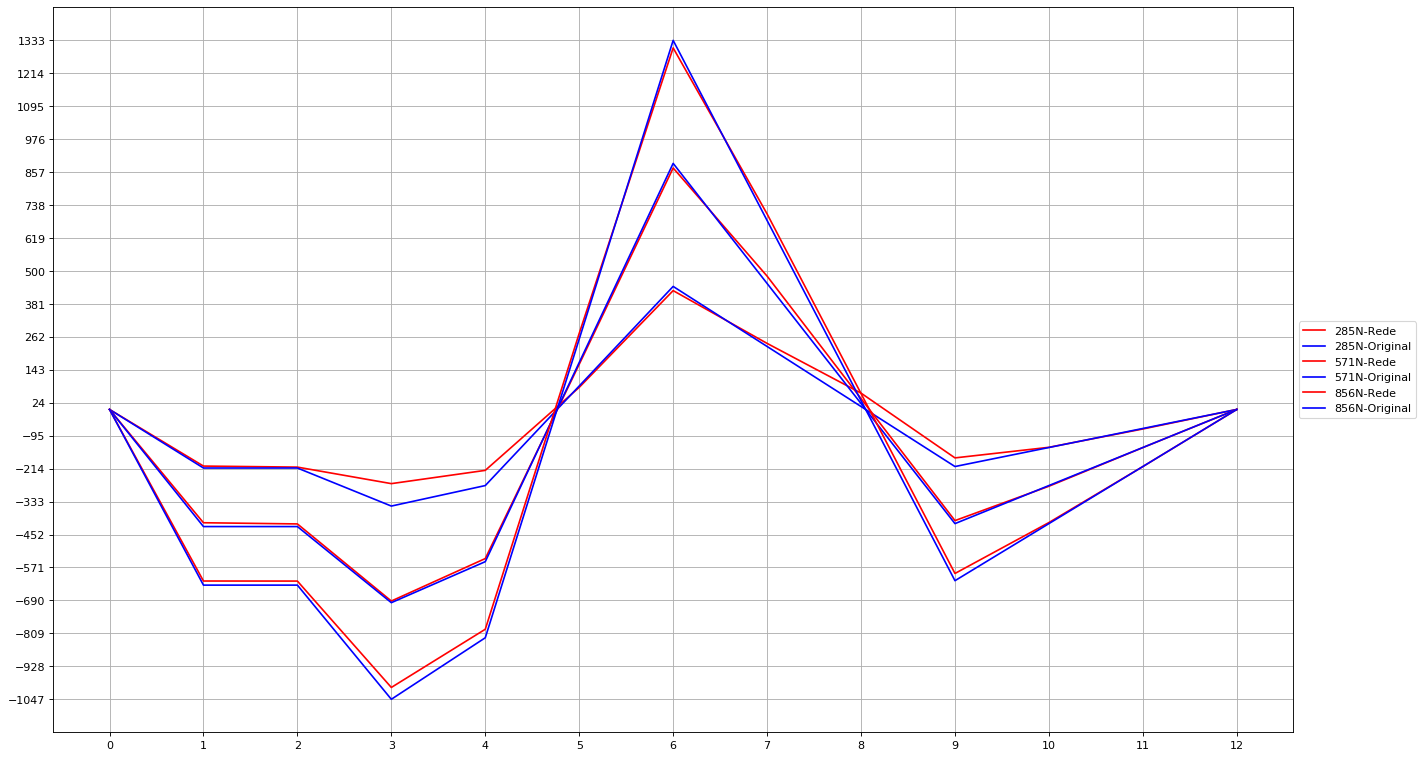

errors1
  [inf 2.566036118576913 2.750891800859126 5.06675757268195
 4.2319574916397045 7.873905059533296 2.1153736903552187
 2.7387566872396034 132.99555974892155 8.290272432115199
 3.1689536277184955 3.9230444363193167 inf]


c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in true_divide


In [18]:
make_graph(xticks,Inc_MOMENT_1,MOMENT1)

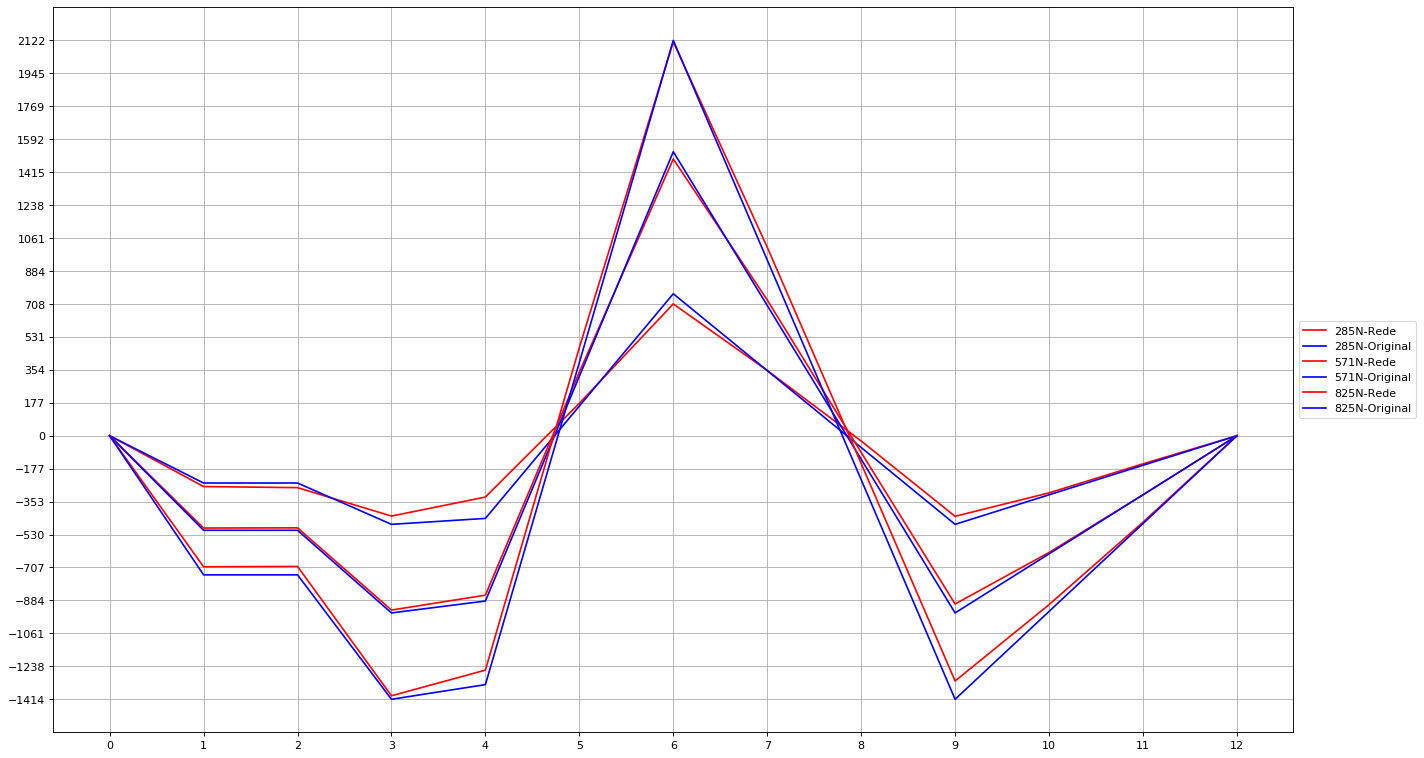

errors1
  [inf 3.9243497330519244 4.373833396319863 6.285688956258704
 7.831130570607816 21.77814005316607 1.6524192838806266 2.7669507278579752
 31.819891117640072 9.024201077754881 6.044942803585645 4.451815963162005
 inf]


c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars


In [19]:
make_graph(xticks,Inc_MOMENT_2,MOMENT2)

In [5]:
condition=data.iloc[np.where(data.iloc[:][5]>data.iloc[:][3])]
condition=condition.iloc[np.where(condition.iloc[:][4]>condition.iloc[:][3])]
condition=condition.iloc[np.where(condition.iloc[:][2]==9)]
condition=condition.iloc[np.where(condition.iloc[:][0]==2)]
condition=condition.iloc[np.where(condition.iloc[:][1]==4)]
condition=condition.iloc[np.where(condition.iloc[:][3]%30==0)]
condition

NameError: name 'data' is not defined

[0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.] [270. 540. 540.]


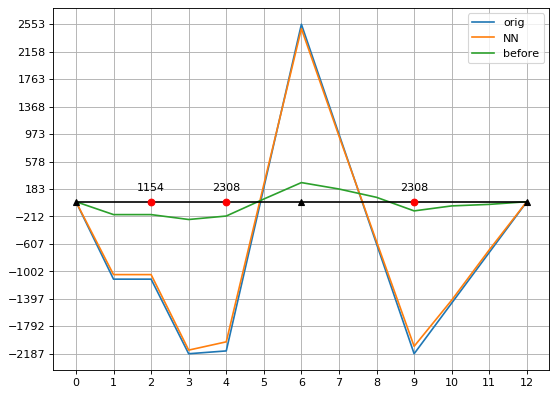

[0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.] [150. 300. 300.]


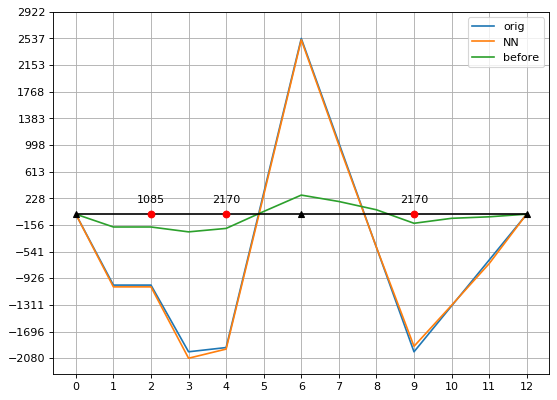

[0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.] [30. 60. 60.]


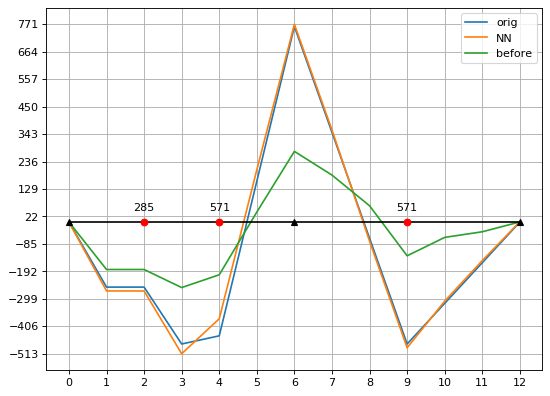

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0.]


ValueError: x and y must have same first dimension, but have shapes (0,) and (3,)

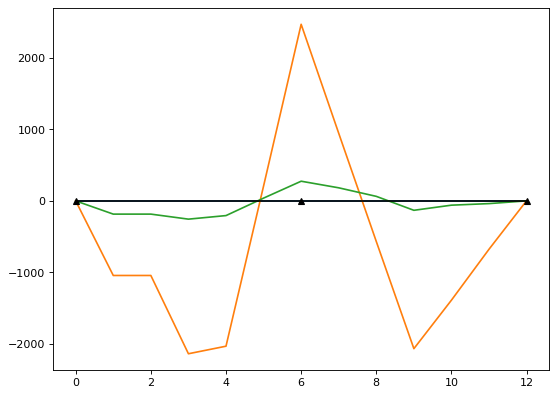

In [131]:
for ii in condition.index[0:20]:
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    print(X[ii,:,0],Ls[ii,:,0])
    
    maximo = max([max(y_pred1[ii,:]),max(Y[ii,:])])
    minimo = min([min(y_pred1[ii,:]),min(Y[ii,:])])
        
    plt.plot(Y[ii,:],label='orig')
    plt.plot(y_pred1[ii,:],label='NN')
    #plt.plot(Y[ii,:]-y_pred1[ii,:],label='error')
    plt.plot(Inc_MOMENT[0,:],label='before')
    plt.plot([0,0,0,0,0,0,0,0,0,0,0,0,0],'k-')
    plt.plot([0,6,12],[0,0,0],'^k')
    loads=np.where(X[ii,:,0]==1)[0]
    plt.plot(loads,[0,0,0],'ro')
    
    for i in range(0,3):
        plt.annotate(int(Ls[ii,i,0]*LPF[ii,0]), # this is the text
        (loads[i],0), # this is the point to label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        ha='center') # horizontal alignment can be left, right or center

        
    stepd=(maximo-minimo)/12.0
    plt.yticks(np.arange(minimo, maximo +stepd ,step=stepd))
    plt.xticks(xticks)
    plt.legend()
    plt.grid()
    plt.show()
    time.sleep(2) 
    plt.close()
